In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt




In [2]:
d=pd.read_csv("hotel.csv")

In [3]:

d.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
d.shape

(119390, 32)

In [ ]:
d.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:

d['reservation_status_date']=pd.to_datetime(d['reservation_status_date'])

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [ ]:
for col in d.describe(include='object').columns:
  print(col)
  print(d[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [ ]:
d.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
d.drop(['company','agent'],axis=1,inplace=True)
d.dropna(inplace=True)


In [ ]:
d.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#removing the adr which is >5000 and saving only<5000 to handle more effectiently
#because if >5000 is present in data then the client did n't able to understand the graphs
#
d=d[d['adr']<5000] #adr= average daily rate

In [ ]:
d.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


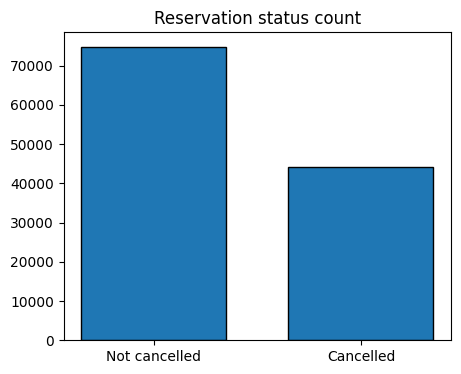

In [ ]:
c=d['is_canceled'].value_counts(normalize=True)  #c=cancelled_percentage
print(c)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled','Cancelled'],d['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

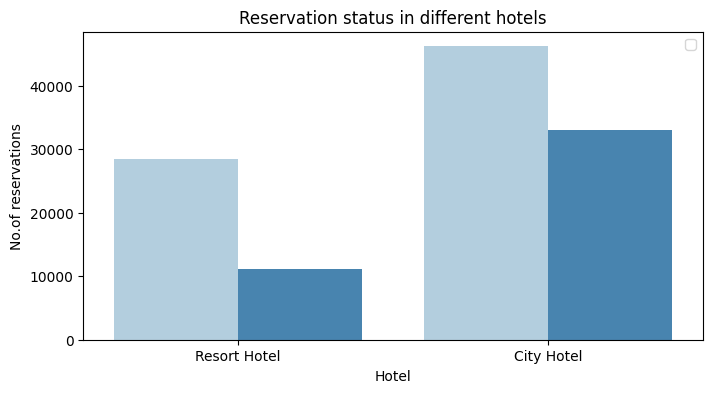

In [ ]:
#plotting the Reservation status in different hotels
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', hue='is_canceled',data=d,palette='Blues')
legen_=ax1.get_legend_handles_labels()

plt.title('Reservation status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('No.of reservations')
plt.legend('Not canceled','canceled')
plt.show()




In [ ]:
#finding the resort hotel cancellation %
resort=d[d['hotel']=='Resort Hotel']
resort['is_canceled'].value_counts(normalize=True)


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
# in hotel section there are resort and city hotel are present
#finding the city hotel cancellation %
city=d[d['hotel']=='City Hotel']
city['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [ ]:
city=city.groupby('reservation_status_date')[['adr']].mean() # grouping the adr and finding mean adr to understand avg adr
resort=resort.groupby('reservation_status_date')[['adr']].mean()

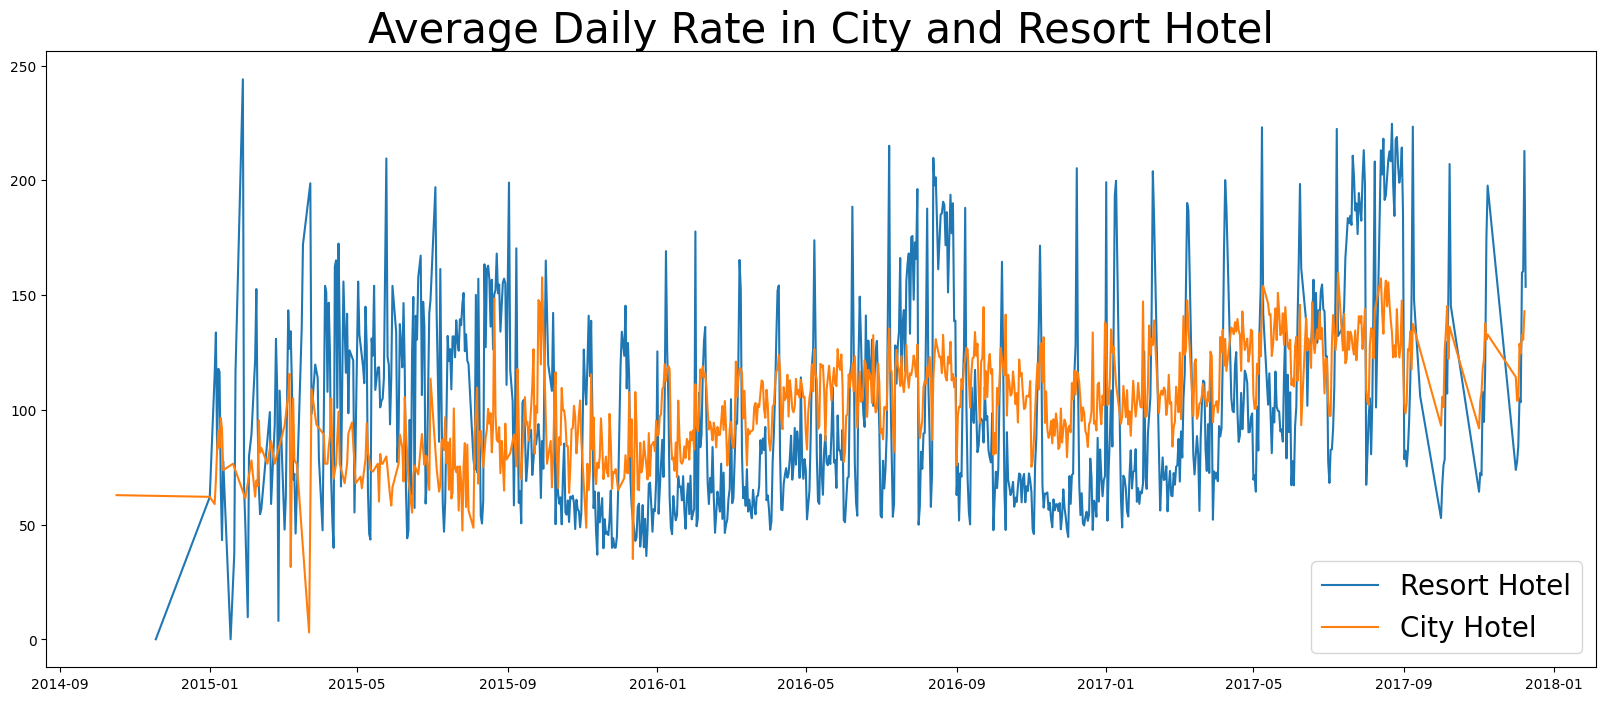

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort.index,resort['adr'],label='Resort Hotel')
plt.plot(city.index,city['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

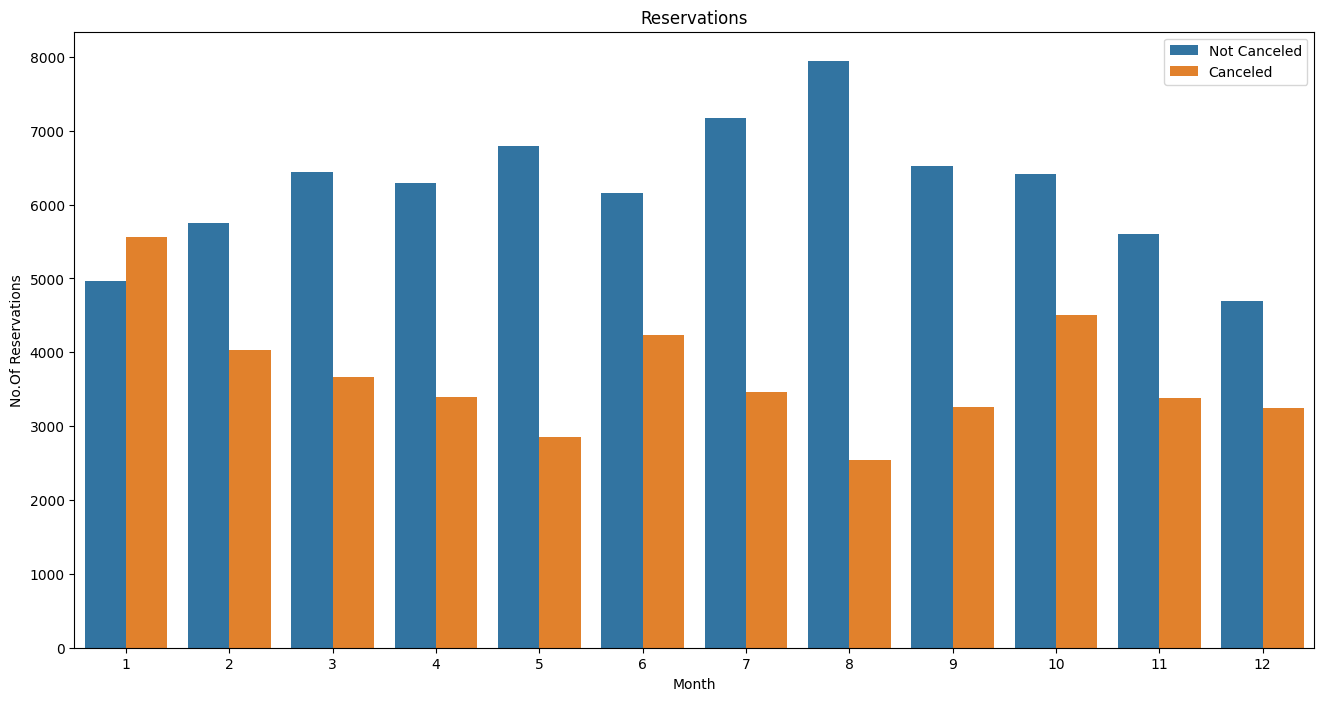

In [ ]:
d['month']=d['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=d )
plt.title("Reservations")
plt.xlabel('Month')
plt.ylabel('No.Of Reservations')
plt.legend(['Not Canceled','Canceled'])
plt.show()

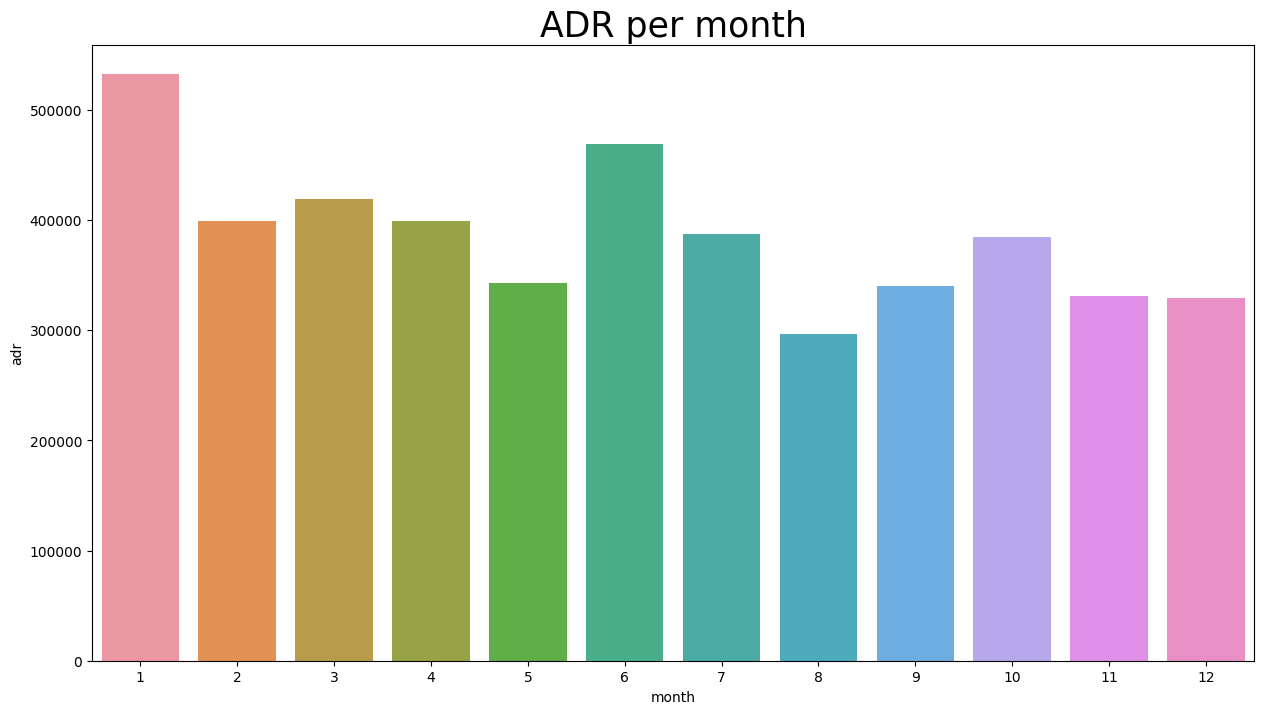

In [ ]:
plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=25)
sns.barplot(x='month', y='adr', data=d[d['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()) #reset index indicates the modified or altered data is replaced by default values after exceuting the pervious operations




plt.show()

In [ ]:
'''from the above two graphs 1.reservations and 2.adr/ month:concluded that if the adr is higher then the cancellation rates is higher
. Check with 1st month in adr is far high so, the cancellations rates are also high in 1st month of reservation graph'''

'from the above two graphs 1.reservations and 2.adr/ month:concluded that if the adr is higher then the cancellation rates is higher\n. Check with 1st month in adr is far high so, the cancellations rates are also high in 1st month of reservation graph'

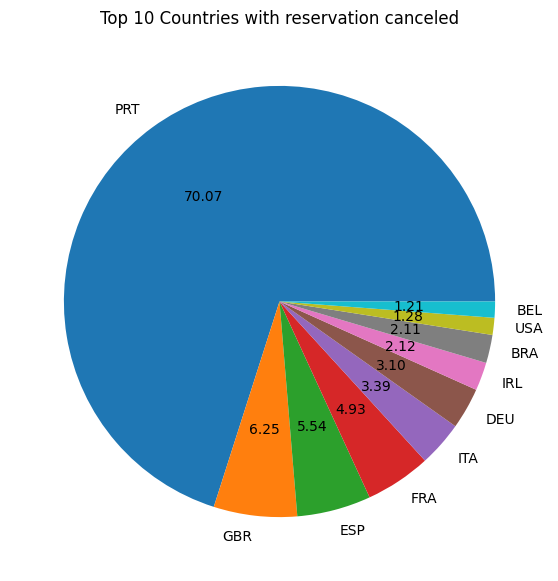

In [ ]:
canc=d[d['is_canceled']==1] #canc=cancellation data
top10=canc['country'].value_counts()[:10] #:10 indicates top 10 countries
plt.figure(figsize=(7,7))
plt.title('Top 10 Countries with reservation canceled')
plt.pie(top10,autopct='%.2f',labels=top10.index)
plt.show()

In [ ]:
d['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [ ]:
canc['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [ ]:
'''by this attempt we can see that most reservations is coming from online and most
ancellation is happening from online
'''

'by this attempt we can see that most reservations is coming from online and most \nancellation is happening from online\n'

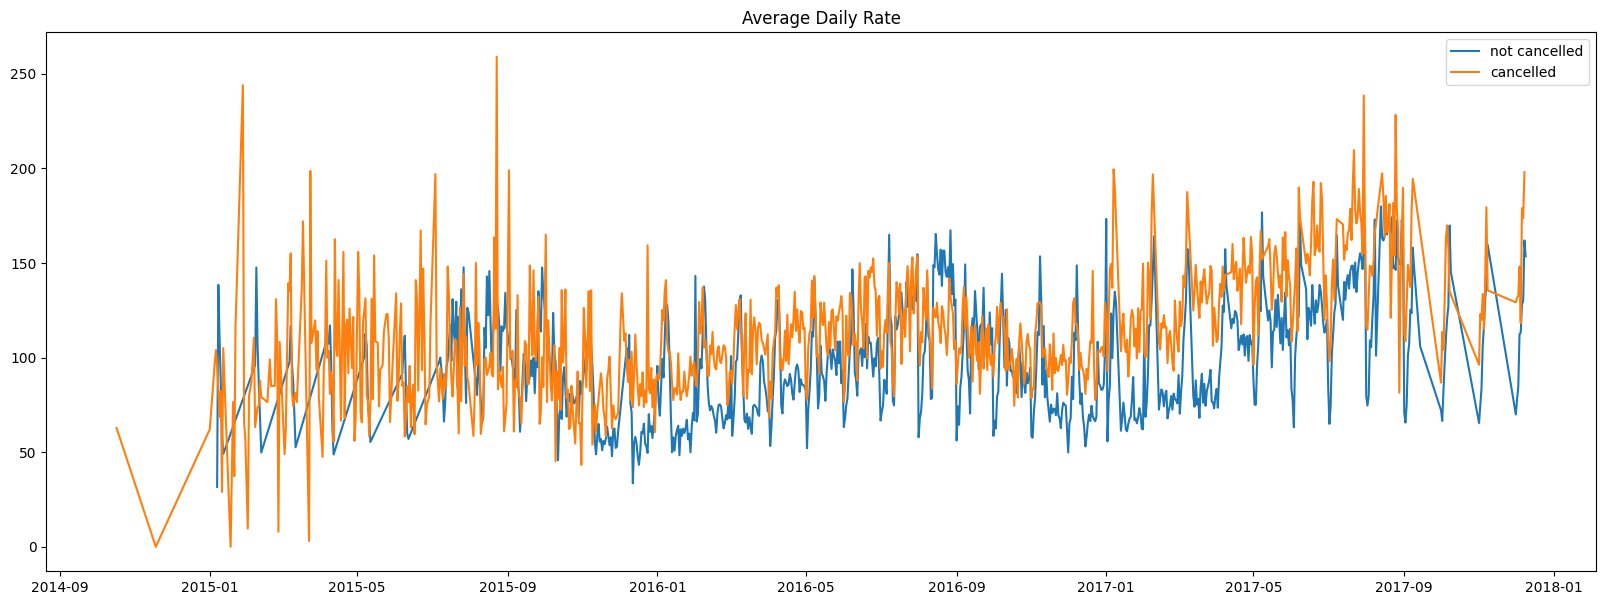

In [ ]:
cancelled_d_adr=canc.groupby('reservation_status_date')[['adr']].mean() # getting the data from cancellation data that incliudes average daily rate in reservation_status_date(mean)
cancelled_d_adr.reset_index(inplace=True)  #reset index indicates the modified or altered data is replaced by default values after exceuting the pervious operations
cancelled_d_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled=d[d['is_canceled']==0]
not_cancelled_adr=not_cancelled.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_adr.reset_index(inplace=True)
not_cancelled_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,7))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'],label='not cancelled')
plt.plot(cancelled_d_adr['reservation_status_date'],cancelled_d_adr['adr'],label='cancelled')
plt.legend()


In [ ]:
cancelled_d_adr=cancelled_d_adr[(cancelled_d_adr['reservation_status_date']>'2016')&(cancelled_d_adr['reservation_status_date']<'2017-09')]
not_cancelled_adr= not_cancelled_adr[(not_cancelled_adr['reservation_status_date']>'2016')& (not_cancelled_adr['reservation_status_date']<'2017-09')]
''' removing the data from which is previous of 2016 and after 2017-09 due to lack of contineous data in 2014, 2015 and 2018'''

' removing the data from which is previous of 2016 and after 2017-09 due to lack of contineous data in 2014, 2015 and 2018'

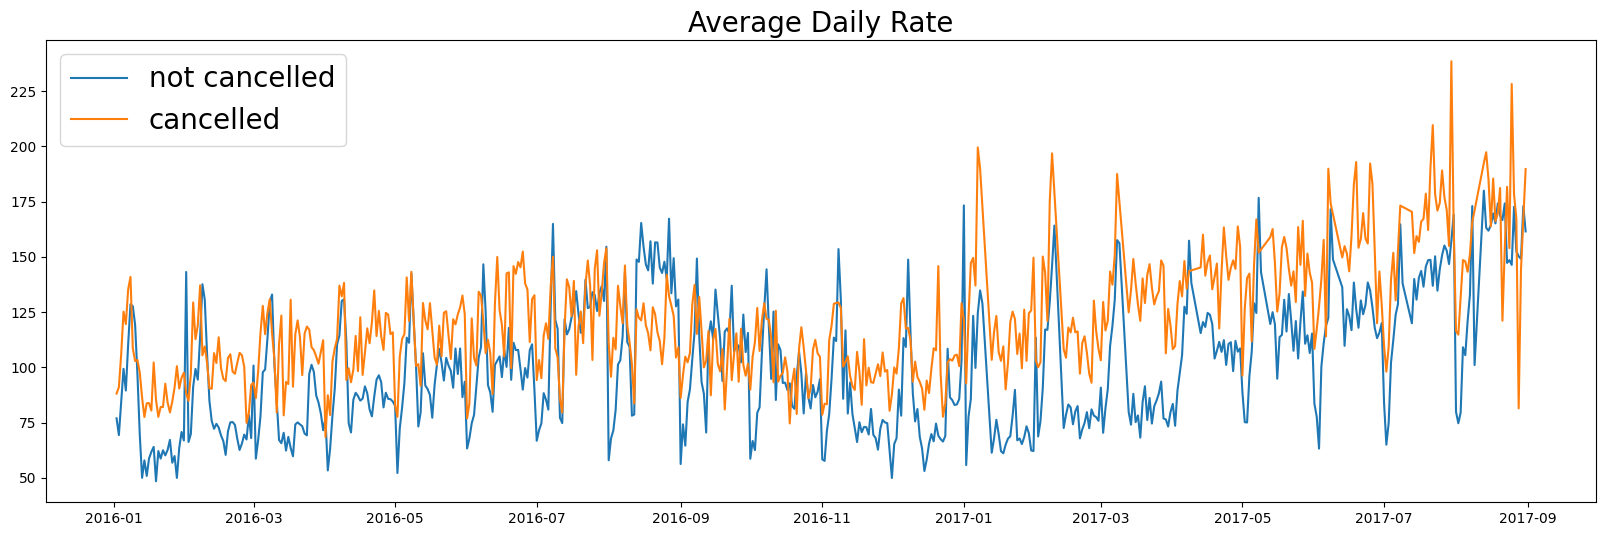

In [ ]:
#plotting the same graph after removing <2016 and >2017-09
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=20)
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'],label='not cancelled')
plt.plot(cancelled_d_adr['reservation_status_date'],cancelled_d_adr['adr'],label='cancelled')
plt.legend(fontsize=20)
plt.show()

In [1]:
'''Comparing average daily rate and hotel cancellation we have concluded that cancellations rates is very high due to the cost of hotel is too expensive. Inorder to gain customer attention,
hotels should do more marketing and giving more Promotions & Offers and giving special discounts during any special occasion '''
'''We are also find the most cancellations are coming from online booking,So maintain the Hotel as it is in photos which is being upload in your website or any other platform'''

'We are also find the most cancellations are coming from online booking,So maintain the Hotel as it is in photos which is being upload in your website or any other platform'